In [1]:
import random

u = random.random()
print(u)

0.18371301001122353


In [2]:
import numpy as np
import matplotlib.pyplot as plt

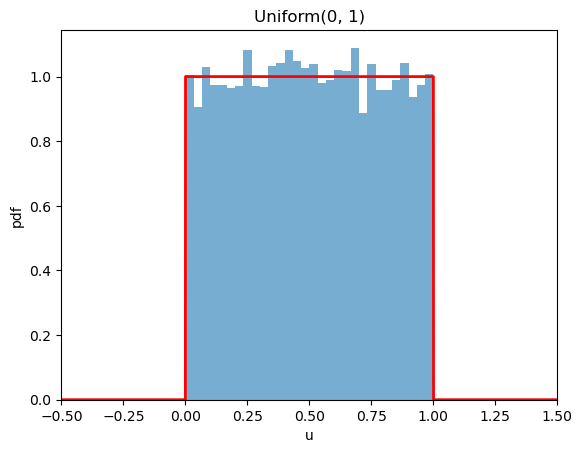

In [3]:
# 1. Generate Uniform(0,1) samples
n = 10000
U = [random.random() for _ in range(n)]

# Plot histogram of samples
plt.hist(U, bins=30, density=True, alpha=0.6)

# Theoretical PDF line
xlim_l, xlim_r = -.5, 1.5
x_vals = np.linspace(xlim_l, xlim_r, n)

a, b = 0, 1
uniform_pdf = lambda x: np.where((x >= a) & (x <= b), 1 / (b - a), 0)

y_vals  = uniform_pdf(x_vals)
plt.plot(x_vals, y_vals, color='red', linewidth=2)

# Labels and title
plt.xlabel('u')
plt.ylabel('pdf')
plt.title('Uniform(0, 1)')
plt.xlim(xlim_l, xlim_r)
plt.show()

$$
X \sim Exp(1)
$$

Transformation
$$
X = -log(U)
$$

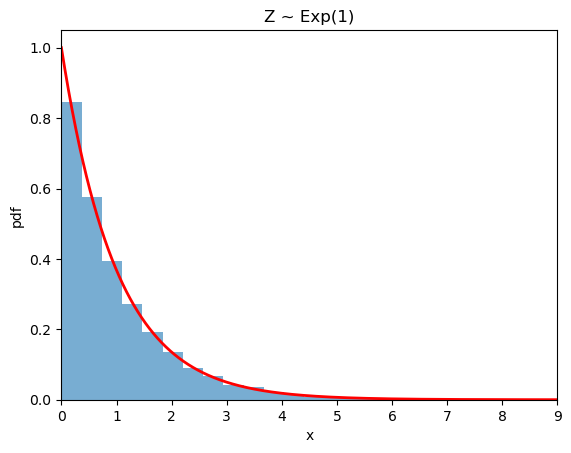

In [4]:
# 1. Generate Uniform(0,1) samples
n = 10000
U = [random.random() for _ in range(n)]

# 2. Apply transformation Z = inverse_F(u)
# Z ~ Exp(1)

def inverse_F(u):
  return -np.log(u)

Z = [inverse_F(u) for u in U]

# pdf
exp_pdf = lambda x: np.exp(-x)

# Plot
xlim_l, xlim_r = 0, 9
x_vals = np.linspace(xlim_l, xlim_r, n)
y_vals = exp_pdf(x_vals)

plt.plot(x_vals, y_vals, color='red', linewidth=2)

plt.hist(Z, bins=30, density=True, alpha=0.6)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Z ~ Exp(1)')
plt.xlim(xlim_l, xlim_r)
plt.show()

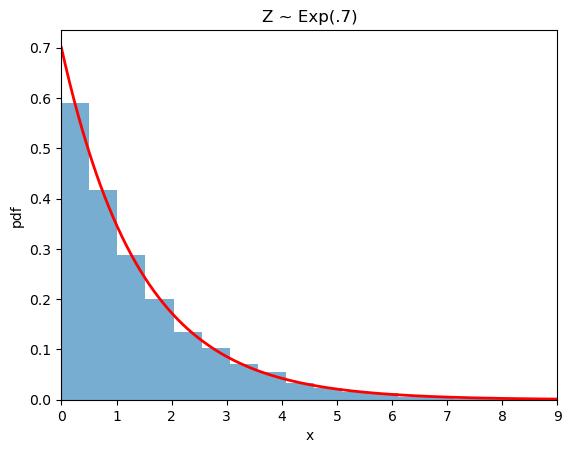

In [5]:
# 1. Generate Uniform(0,1) samples
n = 10000
U = [random.random() for _ in range(n)]

# 2. Apply transformation Z = inverse_F(u)
# Z ~ Exp(lambda)

# Params
lambda_val = .7

def inverse_F(u, lambda_val):
  return -np.log(u) / lambda_val

X = [inverse_F(u, lambda_val) for u in U]

# pdf
exp_pdf = lambda x, lambda_val: lambda_val * np.exp(- (lambda_val * x))

# Plot
xlim_l, xlim_r = 0, 9
x_vals = np.linspace(xlim_l, xlim_r, n)
y_vals = exp_pdf(x_vals, lambda_val)

plt.plot(x_vals, y_vals, color='red', linewidth=2)

plt.hist(X, bins=30, density=True, alpha=0.6)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Z ~ Exp(.7)')
plt.xlim(xlim_l, xlim_r)
plt.show()

## Triangular using inversion method
PDF
$$
p_0(x) = \frac{2}{a} \left( 1 - \frac{x}{a} \right), \quad 0 \leq x \leq a
$$

CDF
$$
F_X(x) = \frac{2}{a} \left(x - \frac{x^2}{2a} \right)
$$

$$
\Rightarrow F^{-1}_X (u) = a(1 - \sqrt{u})
$$

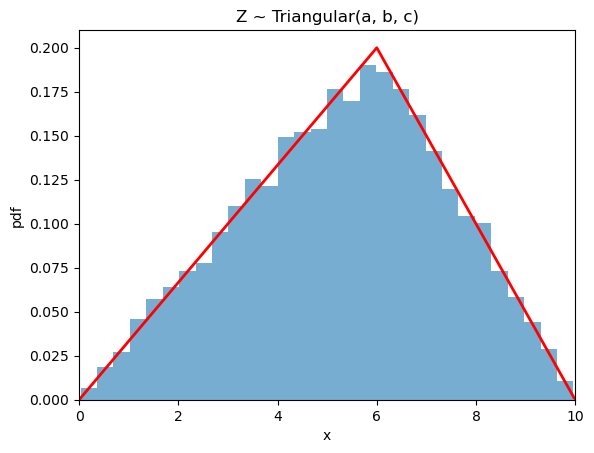

In [6]:
# 1. Generate Uniform(0,1) samples
n = 10000
U = [random.random() for _ in range(n)]

# 2. Apply transformation Z = inverse_F(u)
# Z ~ Triangular(a)

# Params
a = 0 # left bound
b = 10 # right bound
c = 6 # mode (peak)

def inverse_F(u, a, b, c):
  Fc = (c - a) / (b - a)
  return np.where(
      u < Fc,
      a + np.sqrt(u * (b - a) * (c - a)),
      b - np.sqrt((1 - u) * (b - a) * (b - c)))

X = [inverse_F(u, a, b, c) for u in U]

# pdf
triangular_pdf = lambda x, a, b, c: np.piecewise(
    x,
    [x < a,
     (x >= a) & (x < c),
     x == c,
     (x > c) & (x <= b),
     x > b],
    [0,
     lambda x: 2 * (x - a) / ((b - a) * (c - a)),
     2 / (b - a),
     lambda x: 2 * (b - x) / ((b - a) * (b - c)),
     0]
)


# Plot
xlim_l, xlim_r = a, b
x_vals = np.linspace(xlim_l, xlim_r, n)
y_vals = triangular_pdf(x_vals, a, b, c)

plt.plot(x_vals, y_vals, color='red', linewidth=2)

plt.hist(X, bins=30, density=True, alpha=0.6)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Z ~ Triangular(a, b, c)')
plt.xlim(xlim_l, xlim_r)
plt.show()

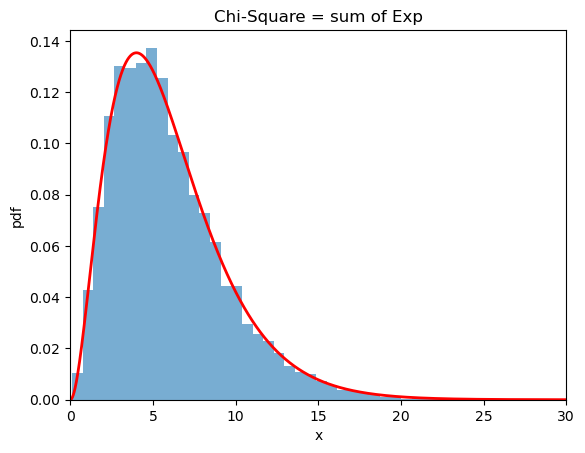

In [7]:
# Parameters
n = 10000
k = 3 # So degrees of freedom df = 2k = 6
lambda_val = 1

# Generate U[i][j] ~ Uniform(0,1)
U = [[random.random() for _ in range(k)] for _ in range(n)]

# Transform and sum across k Exp
def inverse_F(u, lambda_val):
    return -np.log(u) / lambda_val

X = [2 * sum(inverse_F(u_j, lambda_val) for u_j in u_row) for u_row in U]

# pdf
from scipy.stats import chi2

df = 2 * k
xlim_l, xlim_r = 0, 30
x_vals = np.linspace(xlim_l, xlim_r, n)
y_vals = chi2.pdf(x_vals, df)

# Plot
plt.plot(x_vals, y_vals, color='red', linewidth=2)
plt.hist(X, bins=50, density=True, alpha=0.6)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title(f'Chi-Square = sum of Exp')
plt.xlim(xlim_l, xlim_r)
plt.show()

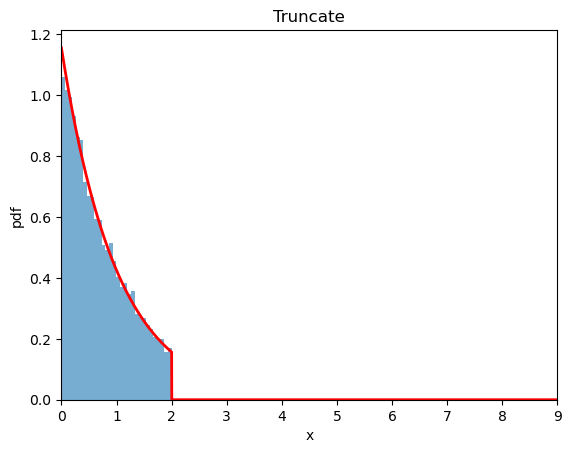

In [8]:
# Truncate Exp(1)

# 1. Generate Uniform(0,1) samples
n = 10000
U = [random.random() for _ in range(n)]

# 2. Apply transformation Z = truncate_transform(u)
def truncate_transform(u):
  return -np.log(1 + (np.exp(-2) - 1) * u)

X = [truncate_transform(u) for u in U]

# pdf
q = lambda x: np.where(
    (x >= 0) & (x <= 2),
    np.exp(-x) / (1 - np.exp(-2)),
    0
)

# Plot
xlim_l, xlim_r = 0, 9
x_vals = np.linspace(xlim_l, xlim_r, n)
y_vals = q(x_vals)

plt.plot(x_vals, y_vals, color='red', linewidth=2)

plt.hist(X, bins=30, density=True, alpha=0.6)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Truncate')
plt.xlim(xlim_l, xlim_r)
plt.show()

# Box Muller

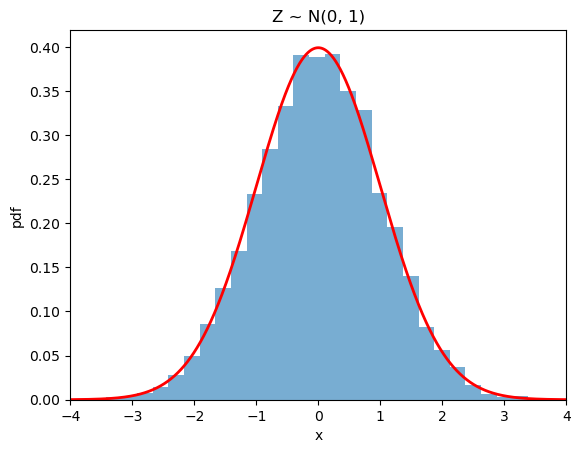

In [9]:
# 1. Generate Uniform(0,1) samples
n = 10000  # must be even
U1 = [random.random() for _ in range(n // 2)]
U2 = [random.random() for _ in range(n // 2)]

# 2. Apply Box-Muller Transform
def box_muller(u1, u2):
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    z0 = r * np.cos(theta)
    z1 = r * np.sin(theta)
    return z0, z1

Z = []
for u1, u2 in zip(U1, U2):
    z0, z1 = box_muller(u1, u2)
    Z.extend([z0, z1]) # add all samples z0, z1 to Z -> Z = [z0, z1, z0, z1, ...]

# PDF of standard normal
normal_pdf = lambda x, mu, sigma: (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plot
xlim_l, xlim_r = -4, 4
x_vals = np.linspace(xlim_l, xlim_r, n)
y_vals = normal_pdf(x_vals, 0, 1)

plt.plot(x_vals, y_vals, color='red', linewidth=2)
plt.hist(Z, bins=30, density=True, alpha=0.6)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Z ~ N(0, 1)')
plt.xlim(xlim_l, xlim_r)
plt.show()

# Generate Exp($\lambda$) using VDR

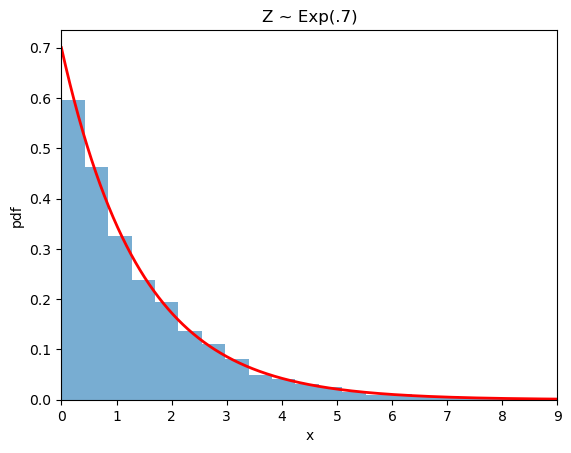

In [10]:
# Params
lambda_val = .7
epsilon = 1e-10

# 1. Generate Uniform(0, lambda_val) samples
n = 10000
U = [random.random() for _ in range(n)]
Z = [u * (lambda_val - epsilon) + epsilon for u in U] # Avoid 0

# 2. Sample x' uniformly on the set C(z')

def C(z, lambda_val):
  return -(1/ lambda_val) * np.log(z / lambda_val)

X = [C(z, lambda_val) for z in Z]

# pdf
exp_pdf = lambda x, lambda_val: lambda_val * np.exp(- (lambda_val * x))

# Plot
xlim_l, xlim_r = 0, 9
x_vals = np.linspace(xlim_l, xlim_r, n)
y_vals = exp_pdf(x_vals, lambda_val)

plt.plot(x_vals, y_vals, color='red', linewidth=2)

plt.hist(X, bins=30, density=True, alpha=0.6)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Z ~ Exp(.7)')
plt.xlim(xlim_l, xlim_r)
plt.show()

In [11]:
normal_pdf = lambda x, mu, sigma: (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

exp_pdf = lambda x, lambda_val: lambda_val * np.exp(- (lambda_val * x))

accept:  4308


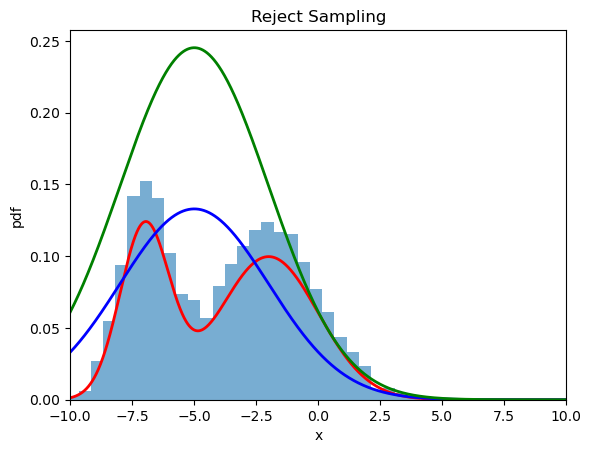

In [12]:
alpha_1, alpha_2 = 0.5, 0.3
mu_1, sigma_1 = -2, 2
mu_2, sigma_2 = -7, 1

prop_mu, prop_sigma = -5, 3

combined_pdf = lambda x, mu_1, sigma_1, mu_2, sigma_2: alpha_1 * normal_pdf(x, mu_1, sigma_1) + alpha_2 * normal_pdf(x, mu_2, sigma_2)

# choosing propotional pi(x)
def pi(x, mu, sigma):
    return normal_pdf(x, mu, sigma)

# Plot
xlim_l, xlim_r = -10, 10
x_vals = np.linspace(xlim_l, xlim_r, n)
y_vals = combined_pdf(x_vals, mu_1, sigma_1, mu_2, sigma_2)

z_vals = pi(x_vals, prop_mu, prop_sigma)

# choosing L
L = max(y_vals / z_vals)

# Box-Muller: Sample from standard normal
def box_muller():
    u1, u2 = random.random(), random.random()
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    return r * np.cos(theta)  # One sample

# Transform standard normal to proposal N(prop_mu, prop_sigma)
def sample_pi():
    return prop_mu + prop_sigma * box_muller()

# Perform rejection sampling
accepted = []
attempts = 0
while attempts < n:
    x = sample_pi()
    u = random.random()
    px = combined_pdf(x, mu_1, sigma_1, mu_2, sigma_2)
    pix = pi(x, prop_mu, prop_sigma)
    if u < px / (L * pix):
        accepted.append(x)
    attempts += 1

# Report efficiency
print("accept: ", len(accepted))

plt.hist(accepted, bins=30, density=True, alpha=0.6)
plt.plot(x_vals, y_vals, color='red', linewidth=2)
plt.plot(x_vals, z_vals, color='blue', linewidth=2)
plt.plot(x_vals, L * z_vals, color='green', linewidth=2)
plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Reject Sampling')
plt.xlim(xlim_l, xlim_r)
plt.show()


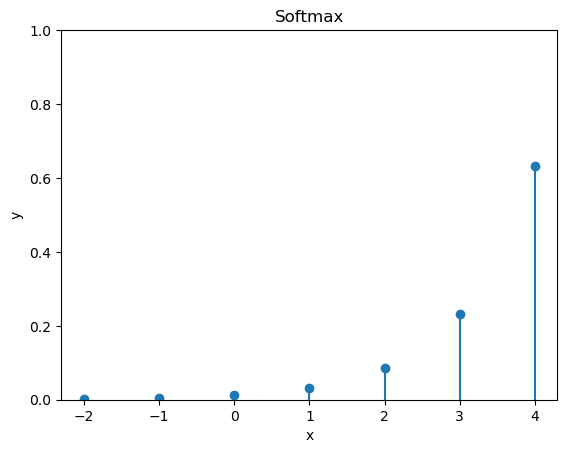

In [13]:
left, right = -2, 4
n = right - left + 1
# Softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x)) # stability trick
    return e_x / np.sum(e_x)

o = np.linspace(left, right, n)
probs = softmax(o)

# PMF-like plot using stem
plt.stem(o, probs, basefmt=" ")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Softmax')
plt.ylim(0, 1)
plt.show()
